In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

config = json.load(open("config.json"))
N_CLASSES = config.get("N_CLASSES", 2)
N_POISONED_CLIENTS = config.get("N_POISONED_CLIENTS", 0)


In [2]:
import numpy as np
from scipy.optimize import curve_fit

# Example for Loss curve
def loss_func(x, L_max, A, k):
    return L_max - A * np.exp(-k * x)

# Example for Accuracy curve
def acc_func(x, A, k, y_min):
    return A * np.exp(-k * x) + y_min



     poisoned      loss  accuracy
0           0  0.094552  1.000000
1           1  0.127709  0.990099
2           2  0.160669  0.980392
3           3  0.189247  0.970874
4           4  0.216908  0.961538
..        ...       ...       ...
96         96  0.693013  0.509184
97         97  0.693063  0.510152
98         98  0.693098  0.501010
99         99  0.693094  0.503518
100       100  0.693077  0.508000

[101 rows x 3 columns]
Loss function parameters: [0.69836912 0.58567351 0.048108  ]
Accuracy function parameters: [0.64915563 0.01420018 0.34655427]


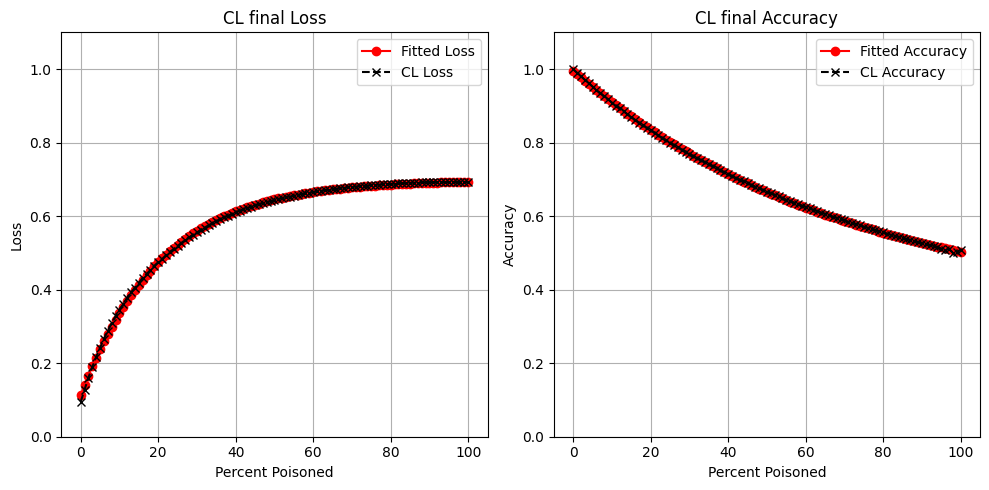

In [3]:
df_list = []
for i in range(101):
    csv_path = fr'results\ML101_linear_CL_batch_poisoned_{i}\ML101_linear_CL_batch_poisoned_{i}.csv'
    df = pd.read_csv(csv_path)
    df['poisoned'] = i
    df = df[['poisoned', 'loss', 'accuracy']]
    df_list.append(df.iloc[-1:, :])
df_all = pd.concat(df_list, ignore_index=True)
df_all.to_csv('results/ML101_linear_CL_batch_poisoned.csv', index=False)
print(df_all)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=False)

# All records up to current
poisoned = df_all['poisoned'].to_list()
losses = df_all['loss'].to_list()
accs = df_all['accuracy'].to_list()

# Fit
params_loss, _ = curve_fit(loss_func, poisoned, losses)
params_acc, _ = curve_fit(acc_func, poisoned, accs)
print(f"Loss function parameters: {params_loss}")
print(f"Accuracy function parameters: {params_acc}")

gen_loss = np.array([loss_func(x, *params_loss) for x in poisoned])
gen_acc = np.array([acc_func(x, *params_acc) for x in poisoned])
ax1.plot(poisoned, gen_loss, marker='o', color='red', label='Fitted Loss')
ax2.plot(poisoned, gen_acc, marker='o', color='red', label='Fitted Accuracy')

ax1.plot(poisoned, losses, marker='x', color='black', linestyle='--', label='CL Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Percent Poisoned')
ax1.set_title('CL final Loss')
ax1.grid(True)
ax1.set_ylim(0, 1.1)
ax1.legend()

ax2.plot(poisoned, accs, marker='x', color='black', linestyle='--', label='CL Accuracy')
ax2.set_xlabel('Percent Poisoned')
ax2.set_ylabel('Accuracy')
ax2.set_title('CL final Accuracy')
ax2.grid(True)
ax2.set_ylim(0, 1.1)
ax2.legend()

plt.tight_layout()
save_name_path = f'results/ML101_linear_CL_batch_poisoned.jpg'
plt.savefig(save_name_path)

     poisoned      loss  accuracy
0           0  0.093581  1.000000
1           1  0.126857  0.990099
2           2       NaN       NaN
3           3  0.188596  0.970874
4           4  0.216330  0.961538
..        ...       ...       ...
96         96       NaN       NaN
97         97  0.693062  0.505584
98         98  0.693097  0.500505
99         99  0.693093  0.501759
100       100  0.693077  0.513750

[101 rows x 3 columns]
Loss function parameters: [0.69824216 0.58564589 0.04814547]
Accuracy function parameters: [0.6491724  0.01419615 0.3464579 ]


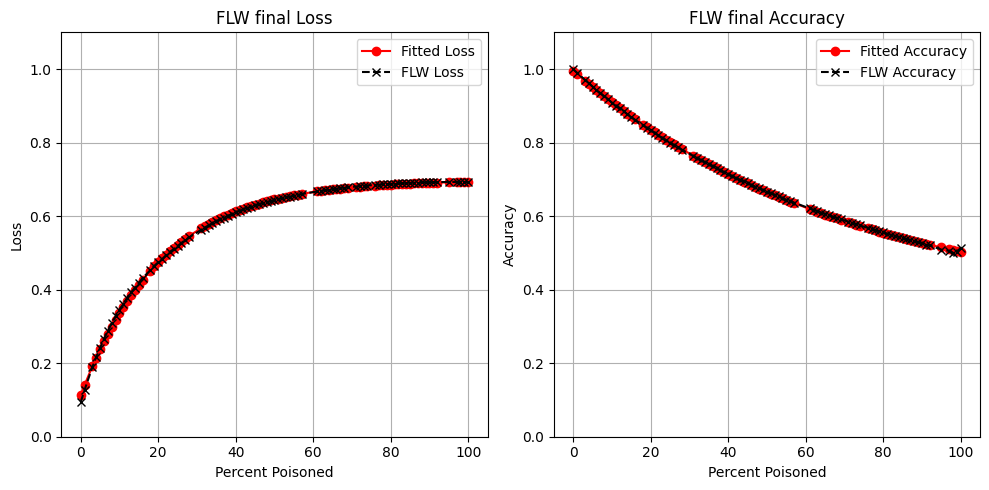

In [4]:
df_list = []
for i in range(101):
    try:
        csv_path = fr'results\ML302_linear_FLW_batch_poisoned_{i}\ML302_linear_FLW_batch_poisoned_{i}.csv'
        df = pd.read_csv(csv_path)
        df['poisoned'] = i
        df = df[['poisoned', 'loss', 'accuracy']]
        df_list.append(df.iloc[-1:, :])
    except Exception as e:
        df_list.append(pd.DataFrame({
            'poisoned': [i],
            'loss': [np.nan],
            'accuracy': [np.nan]
        }))
df_all = pd.concat(df_list, ignore_index=True)
df_all.to_csv('results/ML302_linear_FLW_batch_poisoned.csv', index=False)
print(df_all)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=False)

# All records up to current
fit_df = df_all.dropna(subset=['loss', 'accuracy'])
poisoned = fit_df['poisoned'].to_numpy()
losses = fit_df['loss'].to_numpy()
accs = fit_df['accuracy'].to_numpy()

# Fit
params_loss, _ = curve_fit(loss_func, poisoned, losses)
params_acc, _ = curve_fit(acc_func, poisoned, accs)
print(f"Loss function parameters: {params_loss}")
print(f"Accuracy function parameters: {params_acc}")

gen_loss = np.array([loss_func(x, *params_loss) for x in poisoned])
gen_acc = np.array([acc_func(x, *params_acc) for x in poisoned])
ax1.plot(poisoned, gen_loss, marker='o', color='red', label='Fitted Loss')
ax2.plot(poisoned, gen_acc, marker='o', color='red', label='Fitted Accuracy')

ax1.plot(poisoned, losses, marker='x', color='black', linestyle='--', label='FLW Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Percent Poisoned')
ax1.set_title('FLW final Loss')
ax1.grid(True)
ax1.set_ylim(0, 1.1)
ax1.legend()

ax2.plot(poisoned, accs, marker='x', color='black', linestyle='--', label='FLW Accuracy')
ax2.set_xlabel('Percent Poisoned')
ax2.set_ylabel('Accuracy')
ax2.set_title('FLW final Accuracy')
ax2.grid(True)
ax2.set_ylim(0, 1.1)
ax2.legend()

plt.tight_layout()
save_name_path = f'results/ML302_linear_FLW_batch_poisoned.jpg'
plt.savefig(save_name_path)
